In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [128]:
df =  pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [129]:
#printing the frist five lines
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [130]:
#checking the shape
df.shape

(21, 2)

In [131]:
#checking the datatype
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [132]:
#info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [133]:
#descriptive anlyasis
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [134]:
#relation ship between the continous variable
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


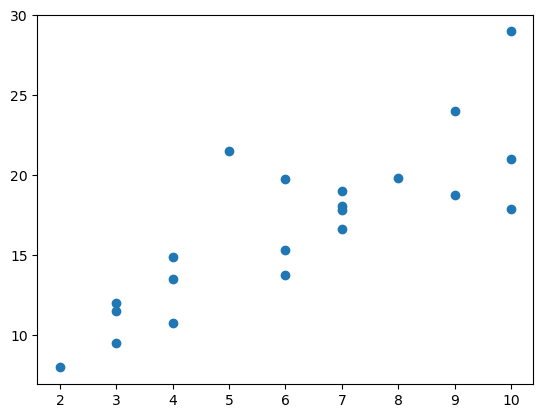

In [135]:
#plotting the scatter plot in matplotlib
plt.scatter(df['Sorting Time'],df['Delivery Time'])

C:\Users\srihari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

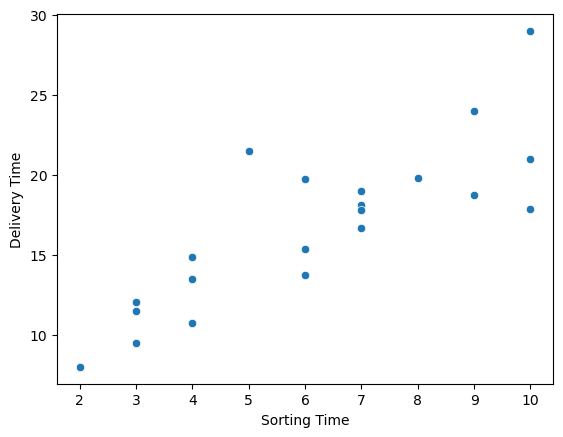

In [136]:
#plotting the scatter plot in seaborn
sbn.scatterplot(df['Sorting Time'],df['Delivery Time'])

In [137]:
#checking the null values
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x20712355e50>,
 'caps': [<matplotlib.lines.Line2D at 0x20712366430>,
 'boxes': [<matplotlib.lines.Line2D at 0x20712355be0>],
 'medians': [<matplotlib.lines.Line2D at 0x207123669d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20712366ca0>],
 'means': []}

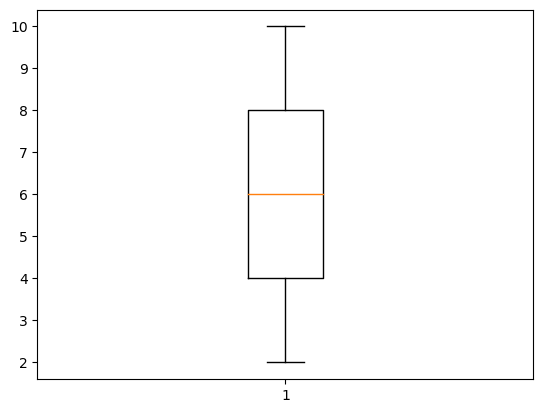

In [138]:
#checking the outliers
plt.boxplot(df['Sorting Time'])

C:\Users\srihari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time'>

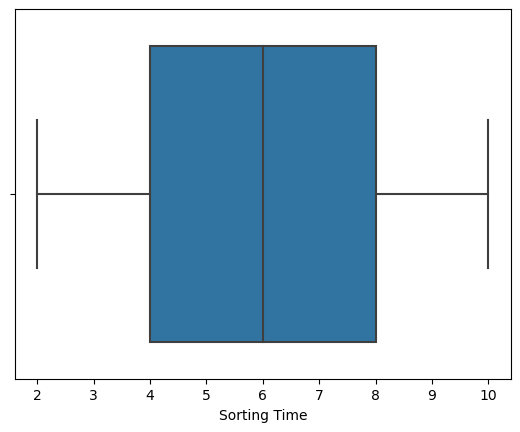

In [139]:
#plotting the graph in seaborn
sbn.boxplot(df['Sorting Time'])

In [140]:
#data transformation
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
for i in range(0,20):
    df.iloc[:,0:2] = SS.fit_transform(df.iloc[:,0:2])

In [141]:
df

,Delivery Time,Sorting Time
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [142]:
X = df[['Sorting Time']]
Y = df[['Delivery Time']]

In [143]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [144]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(7, 1)

In [145]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [146]:
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

In [147]:
Y_pred_train

array([[ 1.2541829 ],
       [-1.53517234],
       [ 0.05874494],
       [-1.13669302],
       [ 0.05874494],
       [ 1.2541829 ],
       [-0.33973438],
       [ 1.65266222],
       [ 0.45722426],
       [-1.13669302],
       [ 0.85570358],
       [-1.13669302],
       [ 0.45722426],
       [ 0.45722426]])

In [148]:
Y_pred_test

array([[ 1.65266222],
       [ 0.45722426],
       [-0.7382137 ],
       [-0.7382137 ],
       [ 1.65266222],
       [ 0.05874494],
       [-0.7382137 ]])

In [149]:
#Metrics for Linaear Regression
from sklearn.metrics import mean_squared_error
print('Accuracy Error',np.sqrt(mean_squared_error(Y_pred_train,Y_train)).round(2))
print('Testing Error',np.sqrt(mean_squared_error(Y_pred_test,Y_test)).round(2))

Accuracy Error 0.56
Testing Error 0.68


In [120]:
#cross validation
#validation set approach
Accuarcy_Error = []
Testing_Error = []
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(df[['Sorting Time']],df[['Delivery Time']],test_size=0.3,random_state=i)
    LR.fit(X_train,Y_train)
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    Accuarcy_Error.append(np.sqrt(mean_squared_error(Y_pred_train,Y_train)).round(2))
    Testing_Error.append(np.sqrt(mean_squared_error(Y_pred_test,Y_test)).round(2))
print('Accuracy Error',np.mean(Accuarcy_Error).round(2))
print('Testing Error',np.mean(Testing_Error).round(2))

Accuracy Error 0.54
Testing Error 0.63
